In [1]:


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy import special
import pandas as pd



In [45]:
def linear_regressor(vec_x,vec_y,x_zero):

    nx = vec_x.shape[0]
    ny = vec_y.shape[0]
    
    if nx != ny:
        print(nx,ny)
        print('Warning: Vector X and Y have different size!')
        
    else:
        print('X & Y have same size :)')
        
        sum_xy = np.sum(vec_x*vec_y)
        sum_x = np.sum(vec_x)
        sum_y = np.sum(vec_y)
        sum_x_sq = np.sum(vec_x**2)
        sum_dx_sq = np.sum((vec_x-np.mean(vec_x))**2)
        b = (nx*sum_xy-sum_x*sum_y)/(nx*sum_x_sq-sum_x**2)
        a = np.mean(vec_y)-b*np.mean(vec_x)
        
        y_fit = a+b*vec_x
        sum_y_yfit_sq = np.sum((vec_y-y_fit)**2)
        
        s_e = np.sqrt(1/(nx-2)*sum_y_yfit_sq)
        
        
        sigma_a = s_e*np.sqrt(sum_x_sq/(nx*sum_dx_sq))
        sigma_b = s_e/np.sqrt(sum_dx_sq)
        
        SST = np.sum((vec_y-np.mean(vec_y))**2)
        SSR = np.sum((y_fit-np.mean(vec_y))**2)
        SSE = sum_y_yfit_sq
        R_sq = SSR/SST
        R_pearson = np.sqrt(R_sq)
        F_test = SSR/SSE
        t_a = a/sigma_a
        t_b = b/sigma_b
        r_lag_1=0 # Lag-1 Correlation of y-data
        x_term = 1+1/nx+(x_zero - np.mean(vec_x))**2/sum_dx_sq
        var_y_fit_predict = s_e**2*(1+r_lag_1)/(1-r_lag_1)*x_term
        
        print('=======================')
        print('y = a + bx')
        print('Slope b:',f"{b:.3}")
        print('Sigma b:',f"{sigma_b:.3}")
        print('Intercept a:',f"{a:.4}")
        print('Sigma Intercept a:',f"{sigma_a:.4}")
        print('MSE: s_e**2:',f"{s_e**2:.4}")
        print('s_e:',f"{s_e:.4}")
        print('=======================')
        print('ANOVA Table')
        print('Total sum of sqares - SST:',f"{SST:.3}")
        print('SSR:',f"{SSR:.3}")
        print('SSE:',f"{SSE:.3}")
        print('Coefficient of determination - R^2:',f"{R_sq:.3}")
        print('Pearson correlation - R:',f"{R_pearson:.3}")
        print('F ratio SSR/SSE - F:',f"{F_test:.3}")
        print('t-Student ratio - a:',f"{t_a:.3}")
        print('t-Student ratio - b:',f"{t_b:.3}")
        print('==========Part d: s(y^): Error of Predictand=============')
        print('var_y_fit_predict(x_zero):', var_y_fit_predict)
        print('sigma_y_fit_predict(x_zero):',np.sqrt(var_y_fit_predict))
        
        
        
        ax = plt.axes()
   


        plt.title('June T vs. p Table A.3 June')
        plt.ylabel('T observed [C]')
        plt.xlabel('p observed [mb]')
        
        plt.scatter(vec_x,vec_y,color='r')
        plt.plot(vec_x,y_fit,linestyle='-',color='b')
        
        
        #return b,a

X & Y have same size :)
y = a + bx
Slope b: -0.925
Sigma b: 0.146
Intercept a: 959.8
Sigma Intercept a: 147.8
MSE: s_e**2: 0.3146
s_e: 0.5609
ANOVA Table
Total sum of sqares - SST: 18.2
SSR: 12.6
SSE: 5.66
Coefficient of determination - R^2: 0.69
Pearson correlation - R: 0.83
F ratio SSR/SSE - F: 2.22
t-Student ratio - a: 6.49
t-Student ratio - b: -6.32
==========Part d: s(y^): Error of Predictand=============
var_y_fit_predict(x_zero): 0.42018533540845415
sigma_y_fit_predict(x_zero): 0.6482170434418199


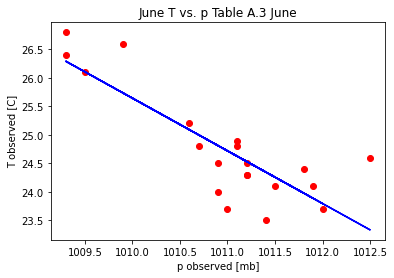

In [46]:
# Exercise 6.1 - A Simple Linear Regression
# a. Derive a simple linear regression equation using the data in Table A.3, relating 
# June temperature (as the predictand) to June pressure (as the predictor).
# b. Explain the physical meanings of the two parameters.
# c. Formally test whether the fitted slope is significantly different
# from zero
# d. Compute the R2 statistic
# e. Estimate the probability that a predicted value corresponding
# to x_0=1013 mb will be within 1°C of the regression line,
# using Equation 6.22
# f. Repeat (e), assuming the prediction variance equals the MSE.



# Table A.3 T June at predictand Y vs. pressure (as predictor X)
T_predictand_Y = np.array([26.1,24.5,24.8,24.5,24.1,24.3,26.4,24.9,
                         23.7,23.5,24.0,24.1,23.7,24.3,26.6,24.6,
                         24.8,24.4,26.8,25.2,])

p_predictor_X = np.array([1009.5,1010.9,1010.7,1011.2,1011.9,
                          1011.2,1009.3,1011.1,1012.0,1011.4,
                          1010.9,1011.5,1011.0,1011.2,1009.9,
                          1012.5,1011.1,1011.8,1009.3,1010.6])


#print(T_min_Cndg*T_min_Ithc)

linear_regressor((p_predictor_X),T_predictand_Y,1013)

In [48]:
# The physical meaning? 
# Low pressure systems  due to heating of the
# surface and ascending air...
# c. Test that the fitted slope is different from zero.

# Slope-0/Sigma(Slope) as t-Statistics?

# t-Student ratio is -6.32 99.99% highly signficiant
# d. R^2 statistics = 0.69 
# e. Probability that 1° at 1013 mb? z=1°C/sigma_y_fit(x_zero)=1.53
# p(Z=1.53) = st.norm.cdf(z)
z=1/0.65
import scipy.stats as st
print('z-score cumulative probability:',st.norm.cdf(z))


# p is 94%

# f. Assume prediction variance is MSE= 0.314
z = 1/0.56
print('z-score cumulative probability:',st.norm.cdf(z))

# p is 96%

z-score cumulative probability: 0.9380320971636288
z-score cumulative probability: 0.9629272344442965
